# Importing Libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# loading the dataset

In [17]:
df = pd.read_csv('credit-card.csv')
print(df.head(10))

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0               0  
1  M2044282225            

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# Exploring the data of transactions
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

# Visualising dataset

In [6]:
# Lets calculate the transaction types and visualize them
type = df["type"].value_counts()
transactions = type.index
values = type.values

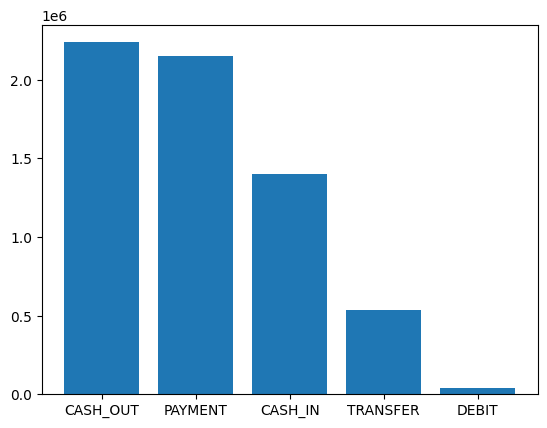

In [7]:
# plotting the plotly bar chart
plt.bar(transactions, values)
plt.show()

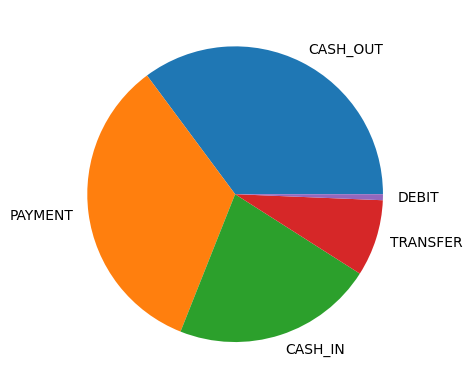

In [8]:
# plotting the pie chart for more clarity
plt.pie(values, labels = transactions)
plt.show()

# Correlation Analysis

In [9]:
# Select only the numerical columns
numeric_df = df.select_dtypes(include=[float, int])

# Now compute the correlation
correlation = numeric_df.corr()

# Print sorted correlation values with 'isFraud'
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


# Preprocessing variables

In [10]:
# Transforming categorical variables into numerical
df['type'] = df['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})
df["isFraud"] = df ["isFraud"].map({0: "No Fraud", 1: "Fraud"})
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,No Fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,No Fraud,0
5,1,2,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,No Fraud,0
6,1,2,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,No Fraud,0
7,1,2,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,No Fraud,0
8,1,2,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,No Fraud,0
9,1,5,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,No Fraud,0


# Building the Classification model

In [11]:
# Lets build a classification model to classify whether the transaction is fraud or not by doing the feature and target selection
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df["isFraud"])

# Splitting the dataset for model training

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

# Accuracy Score

In [14]:
print(model.score(xtest, ytest) * 100)

99.97037383970753


# Predicting a single transaction

In [15]:
features = np.array([[4, 9000.60, 9000.60, 0.00]])
print(model.predict(features))

['Fraud']


In [16]:
features = np.array([[2, 9839.64, 170136.00, 160296.36]])
print(model.predict(features))

['No Fraud']
